<a href="https://colab.research.google.com/github/serenamm/Speaking/blob/master/Mercatus/Lesson4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The data science work flow:

1. Load it
2. Take a peek at it 
3. Clean it
4. Explore it: Make plots and observations.
5. Make comments in-line for readability purposes.
6. Build a model! 

I've done everything except points 2 and 4 for you all. We'll go through the first 5, but will come up with our observations all together. Point 6 will be left for the next lesson.

# So... what are the tools we'll be using?

1. ***Google Colaboratory:***
Google "Colab" is a service that provides free cloud-based Jupyter Notebooks that give you free GPU to work on. It's awesome.

2. ***Jupyter Notebook:*** Jupyter is like a scientific notebook for coding, where you can mix cells of code with cells of output (containing figures and results) in one notebook. Think of chemistry and physics experiements in school, where you would write the details of your experiments with the results all in one notebook. That's what Jupyter allows you to do, except for data and code.

3. ***Pandas:***
Pandas is a Python library for data manipulation and analysis. Pandas and data science go hand in hand.

4. ***DataFrames:***
Not necessarily a tool in their own right, but it's the most useful object in the Pandas library, and again, shows up all over the place in data science. Formally, it's a 2-dimensional labeled data structure with columns of potentially different types. Informally, it's like a SQL table. Or Excel table. It's just a table.

5. ***NumPy:***
Numpy is a Python library for array and matrix manipulation, along with mathematical functions for these arrays and matrices. Again, it's very fundamental in data science work.

6. ***Matplotlib:***
Matplotlib is the most popular plotting library for Python, and it's supposed to be an extension of NumPy. 

7. ***Seaborn:***
Seaborn is another plotting library that's actually an API on top of Matplitlib. It's more user friendly than Matplotlib, and makes nicer charts. Many people prefer it (myself included).

8. ***Scikit-learn:***
Scikit-learn, aka sklearn, or simly scikit, is a machine learning library for Python. It's usually the first library that everyone learns when starting out with machine learning.

9. ***StatsModels:***
Statsmodels is a package that allows you to do statistics in Python. It's more heavily focussed on the statistics rather than machine learning side of things. Think of it as a more mathematically rigorous package, as compared to scikit-learn. 

10. ***LIME:***
The LIME package (Local Interpretable Model-Agnostic Explanations) gives a local (i.e. single classification) explanation of feature importance. Similar to how what is important to one person's identity may be irrelevant to someone else's, a feature may be more important to the classification of one shopper, while for another shopper, it's a different feature that is the most important. LIME helps us look at feature importance on a case by case basis.

# And what data will we be using?

We'll be using a subset of Instacart's 3 millions orders dataset, with shoppers labelled as pet owners ("pet=1") and non-pet owners ("pet=0"). So the data has been worked with a bit. Here's a link to the Medium article where Instacart introduces the dataset: https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2 .

# And what will we be doing with it?

When you build out a data science project, it's important to have a goal. Your goal can be open ended like:

"Let's explore the data and see if there's anything interesting in it."

Or, it can be fairly closed, like:

"I want to model the relationship between peanut butter consumption and marriage rate." (The example here is made up and the idea is borrowed from this site, check it out for some funny "spurious" correlations! http://www.tylervigen.com/spurious-correlations ).

If you find something interesting in the data that you didn't expect, that could be of real business value, so you likely will want to create a model to capture the phenonema. Or, if you find information in your data to back up a previous hypothesis, you again will likely want to create a model. Making a model isn't always the end goal of data exploration, but in the data scientist's workflow, it often is. (A data analyst on the other hand, may dive deeper into picking out business insights from data, rather than focussing on modelling)

In our two sessions, our goal will be to create a model to predict if someone is a pet owner or not, based on their shopping purchases, *excluding products from the pet department*.

# Let's code! 

# First, read in the data

Note that you have to reload data each time you open the file
This takes a while- about 15 mins for a file of 114 mb.
The file we use is .../Lunch&Learn/LL4/instacart_data.csv


In [1]:
from google.colab import files
uploaded = files.upload()

Saving instacart_data.csv to instacart_data.csv


In [2]:
import pandas as pd
import io

# This is the way you read csv files into Colab,
# usually you can do pd.read_csv(file_name)
df = pd.read_csv(io.StringIO(uploaded['instacart_data.csv'].decode('utf-8')))
df.head()

,Unnamed: 0,product_id,reordered,product_name,aisle_id,department_id,user_id,order_dow,order_hour_of_day,pet,department
0,13109318,47209,0,Organic Hass Avocado,24,4,116838,6,16,0,produce
1,17592354,5385,1,Country White Bread,112,3,30752,5,10,0,bakery
2,21650307,33705,0,New York Cheddar Potato Chips,107,19,66975,5,18,0,snacks
3,21976295,11266,1,Dried Mangos,117,19,112882,3,6,0,snacks
4,22307958,41844,1,Honey Nut Cheerios,121,14,12080,0,16,0,breakfast


In [3]:
# Let's get rid of that unnamed column
cols = ["user_id","product_id", "reordered", "product_name", 
        "aisle_id", "department_id", "order_dow",
        "order_hour_of_day", "pet", "department"]
df = df[cols]
df.head()

,user_id,product_id,reordered,product_name,aisle_id,department_id,order_dow,order_hour_of_day,pet,department
0,116838,47209,0,Organic Hass Avocado,24,4,6,16,0,produce
1,30752,5385,1,Country White Bread,112,3,5,10,0,bakery
2,66975,33705,0,New York Cheddar Potato Chips,107,19,5,18,0,snacks
3,112882,11266,1,Dried Mangos,117,19,3,6,0,snacks
4,12080,41844,1,Honey Nut Cheerios,121,14,0,16,0,breakfast


# Let's start by cleaning our data

In [4]:
# Check for missing values
df.isnull().sum()

user_id              0
product_id           0
reordered            0
product_name         0
aisle_id             0
department_id        0
order_dow            0
order_hour_of_day    0
pet                  0
department           0
dtype: int64

Insert summary here.

In [5]:
# Size of data
len(df)

1621724

And another summary.

In [6]:
# Number of unique values in each column
# What about viewing the number of unique values? 
df.nunique()

user_id              185150
product_id            39114
reordered                 2
product_name          39114
aisle_id                134
department_id            21
order_dow                 7
order_hour_of_day        24
pet                       2
department               21
dtype: int64

And another summary.

In [7]:
df.dtypes

user_id               int64
product_id            int64
reordered             int64
product_name         object
aisle_id              int64
department_id         int64
order_dow             int64
order_hour_of_day     int64
pet                   int64
department           object
dtype: object

And yet another summary.

We should also do some checks of our data, to make sure everything is ok.

Some ideas:

1. order_hour_of_day should be between 1 to 24
2. order_dow should be between 1 to 7
3. pet should be 0 or 1
4. Reordered should be 0 or 1

We could do this in a hack-y way by just looking at the "value counts" for each variable, or we could write a function that checks each of these conditions. I'll do it the hacky way since it's fast and easy to visualize.

In [11]:
df.order_hour_of_day.value_counts().sort_index()

0      11049
1       5721
2       3474
3       2568
4       2574
5       4304
6      14631
7      44735
8      85948
9     123025
10    138307
11    136307
12    130579
13    132815
14    134592
15    133585
16    127311
17    104411
18     81956
19     62795
20     49052
21     39805
22     31939
23     20241
Name: order_hour_of_day, dtype: int64

In [13]:
df.order_dow.value_counts().sort_index()

0    310457
1    283517
2    210708
3    192413
4    189480
5    209712
6    225437
Name: order_dow, dtype: int64

In [15]:
df.pet.value_counts()

0    1445054
1     176670
Name: pet, dtype: int64

In [16]:
df.reordered.value_counts()

1    956290
0    665434
Name: reordered, dtype: int64

Summary cell.

# The data is cleaned, so now we can explore.

Keep in mind that while we explore we may see some anomalies pop up. Seeing anomalies imply that there's still some cleaning that needs to be done, and it's normal to go back and forth between exploration and updating the cleaning process.

Since our end goal is to build a model to predict if someone is a pet owner or not, we want to explore the difference between pet owners (pet column = 1) and non-pet owners (pet column = 0).

As is typical for data scientists, the exploratory data analysis (EDA) part of the workflow involves a lot of plotting and visualization. As such, let's load in the two plotting libraries we mentioned.

Note that in this part of the talk, I'll go a bit faster and focus on the process of exploring the data, rather than the code and how to create the figures themselves. Please feel free to study the code on your own time, and ask questions if they come up. Plotting is something that takes a while to perfect (I'm not great at it!) so if you have any suggestions on how to improve these, please let me know! 

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

## Number of purchases per day of week, for both pet owners and non-pet owners.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'not pet owner')

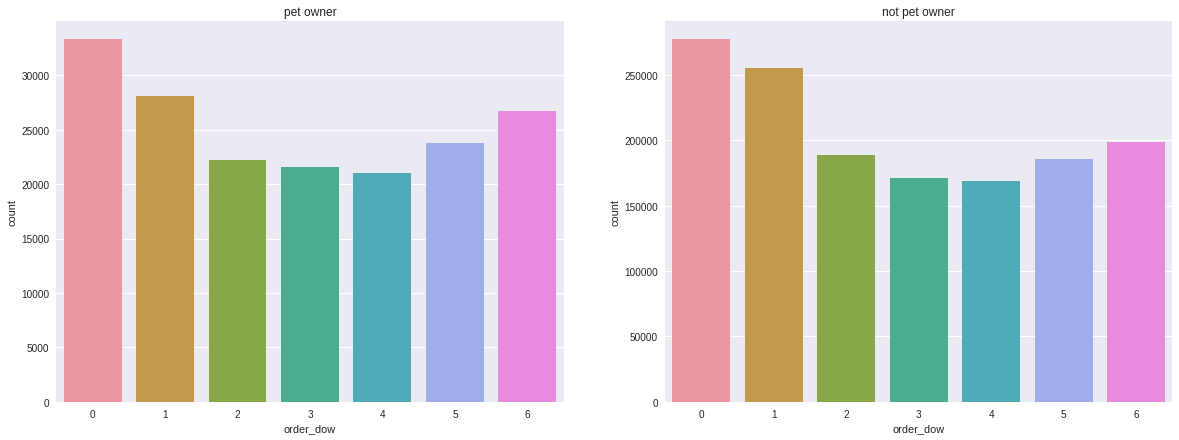

<Figure size 1440x576 with 0 Axes>

In [36]:
  # First we use matplotlib (plt) to plot out 2 figures.
  # The first figure will be for pet owners,
  # the second will be for non-pet owners.
  # Then we use seaborn to make our plots.
  f, axes = plt.subplots(1, 2, figsize=(20,7), sharex=True)
  plt.figure(figsize=(20,8))
  g1 = sns.countplot(x="order_dow", data=df[df.pet==1], ax=axes[0])
  g1.set_title("pet owner")
  g2 = sns.countplot(x="order_dow", data=df[df.pet==0], ax=axes[1])
  g2.set_title("not pet owner")

Summary text.

In [0]:
# I can already see that I'm going to repeat this sort of figure a few times..
# so it's useful to wrap this in a function.

def count_plot(col):
  
  f, axes = plt.subplots(1, 2, figsize=(20,7), sharex=True)
  plt.figure(figsize=(20,8))
  g1 = sns.countplot(x=col, data=df[df.pet==1], ax=axes[0])
  g1.set_title("pet owner")
  g2 = sns.countplot(x=col, data=df[df.pet==0], ax=axes[1])
  g2.set_title("not pet owner")

## Count plot of  order hour of day for pet owners and non-pet owners.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


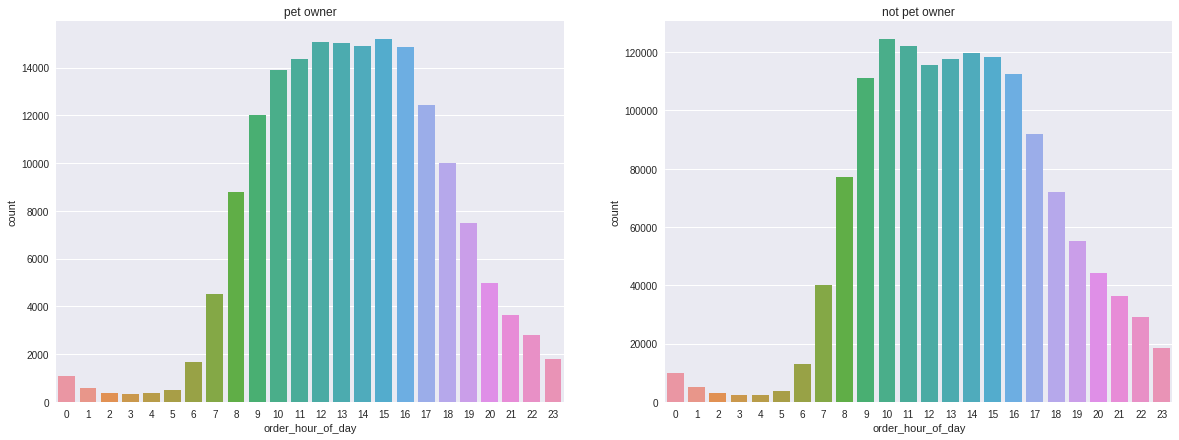

<Figure size 1440x576 with 0 Axes>

In [0]:
count_plot("order_hour_of_day")

Summary text.

## Count plot for number of purchases in each department from for pet owners and non-pet owners.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


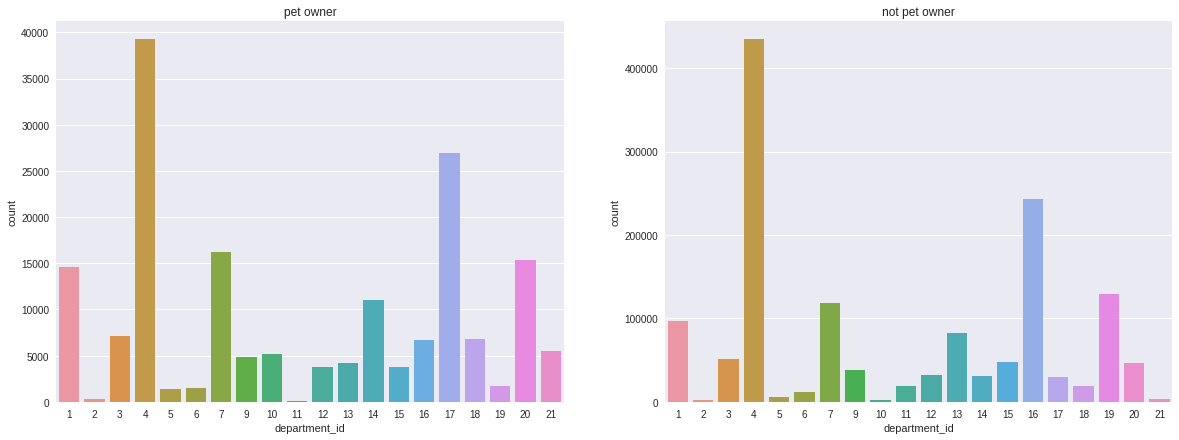

<Figure size 1440x576 with 0 Axes>

In [0]:
count_plot("department_id")

Summary text.

## Histogram of department purchases, for pet owners and non-pet owners.

This is a similar way to view the same thing as above, except we're looking at relative frequencies rather than absolute counts.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


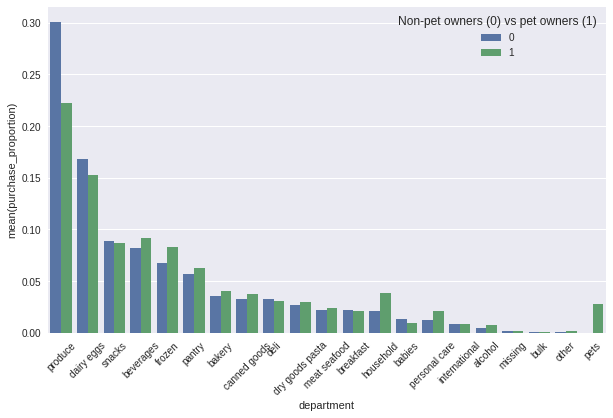

In [38]:
def proportion_plot_both_groups(data):
        
    x, y, hue = "department", "purchase_proportion", "pet"
    hue_order = ["pet owner", "non pet owner"]
    plt.figure(figsize=(10,6))
    (data[x]
     .groupby(data[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xticks(rotation='45')
    l = plt.legend(loc="upper right")
    l.set_title('Non-pet owners (0) vs pet owners (1)')

proportion_plot_both_groups(df)

Summary text.

## Department reordering tendencies of pet owners and non-pet owners.

### Department reorder ratio is the ratio of how many times a pet owner/non-pet owner reorders from a certain department, versus how often they do not reorder (reorder a new item). For example, a 0.55 department reorder ratio for pet owners for department A would mean that 55% of pet owners' orders from department A are items they are reordering.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


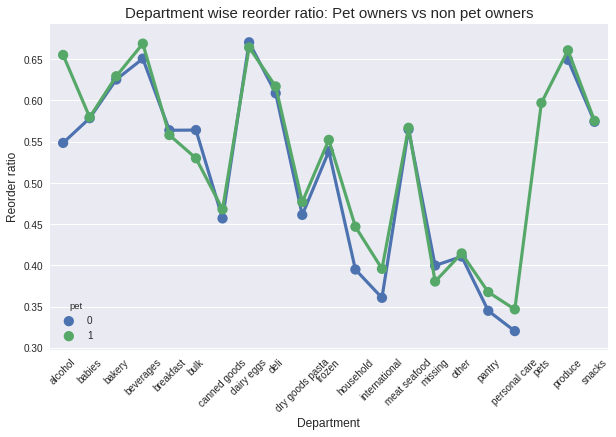

In [39]:
def reorders_plot_both_groups(data):
            
    plot_title="Department wise reorder ratio: Pet owners vs non pet owners"
    grouped_df = data.groupby(["department","pet"])["reordered"].aggregate("mean").reset_index()
    plt.figure(figsize=(10,6))
    sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, 
                  alpha=0.8, hue=grouped_df["pet"])
    plt.ylabel('Reorder ratio', fontsize=12)
    plt.xlabel('Department', fontsize=12)
    plt.title(plot_title, fontsize=15)
    plt.xticks(rotation='45')
    plt.show()

reorders_plot_both_groups(df)

Summary text.

## Day of week reordering tendencies for pet owners and non-pet owners.

### Day of week reorder ratio is how often a group reorders items on a particular day of week, versus how much they do not reorder (order a new item). For example, a reorder ratio of 0.7 means that 70% of purchases are items that are being reordered.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


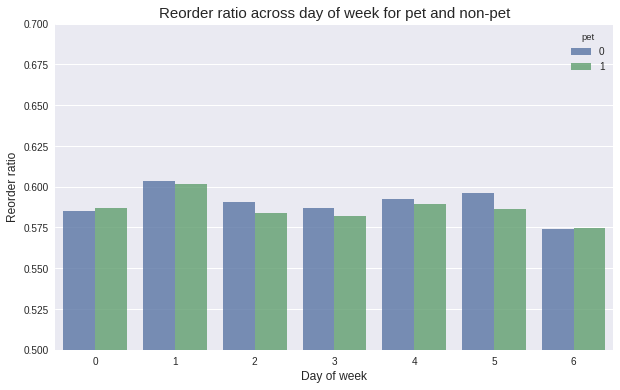

In [40]:
def reorders_dow_both_groups(group):
    plot_title = "Reorder ratio across day of week for {group} and non-{group}".format(group=group)
    grouped_df = df.groupby(["order_dow", group])["reordered"].aggregate("mean").reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, 
                alpha=0.8, hue=grouped_df[group])
    plt.ylabel('Reorder ratio', fontsize=12)
    plt.xlabel('Day of week', fontsize=12)
    plt.title(plot_title, fontsize=15)
    plt.xticks(rotation='horizontal')
    plt.ylim(0.5, 0.7)
    plt.show()

reorders_dow_both_groups("pet")

Summary text.

## Now let's look at things more at the user-level.

## First we'll look at the number of unique department purchases a shopper makes. We'll plot the results aggregated to the pet-owner vs non-pet owner level.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


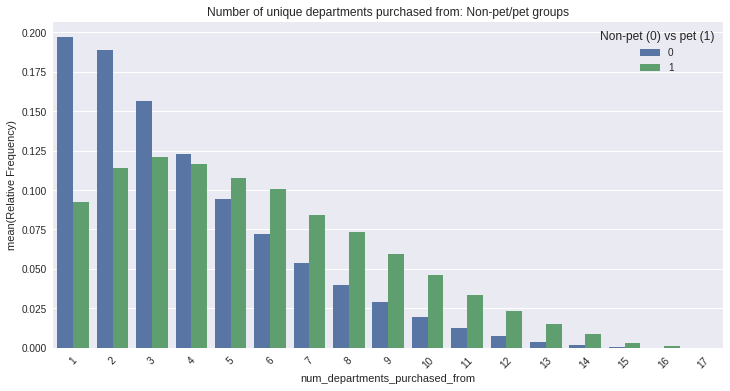

In [41]:
# Number of unique department purchases

def plot_group_proportions(feature_df, order_data, col, group, n, format_xticks, title):
    data = feature_df.merge(order_data[["user_id", group]].drop_duplicates(), on = "user_id")
    x, y, hue = col, "Relative Frequency", group
    hue_order = [group, "not_{}".format(group)]
    plt.figure(figsize=(12,6))
    (data[x]
     .groupby(data[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xticks(rotation='45')
    ax = plt.gca()
    if format_xticks is True:
        for index, label in enumerate(ax.xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False)
    l = plt.legend(loc="upper right")
    l.set_title('Non-{group} (0) vs {group} (1)'.format(group=group))
    plt.title(title)

def get_num_unique_dept_purchases(data):
    num_unique_dept = data.groupby(["user_id"])["department"].aggregate("nunique").reset_index()
    num_unique_dept.columns = ["user_id", "num_departments_purchased_from"]
    return num_unique_dept

num_unique_dept = get_num_unique_dept_purchases(df) # Feature
title = "Number of unique departments purchased from: Non-{g}/{g} groups"
col_name = "num_departments_purchased_from"
plot_group_proportions(num_unique_dept, df, col_name, "pet", 0, False, title.format(g="pet"))

Summary text.

## Average time of day of shopper visit.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


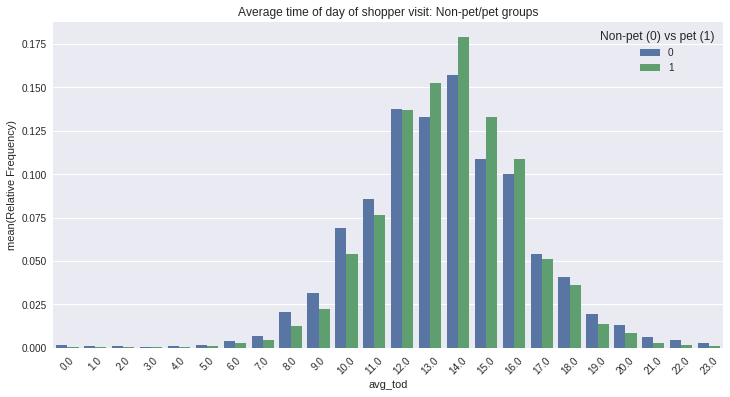

In [42]:
# Average time of day of shopper visit

def get_avg_tod(data):
    avg_tod = data.groupby(["user_id"])["order_hour_of_day"].aggregate("mean").reset_index(name="avg_tod")
    avg_tod["avg_tod"] = round(avg_tod["avg_tod"])
    return avg_tod

avg_tod = get_avg_tod(df)
title = "Average time of day of shopper visit: Non-{g}/{g} groups"
col_name = "avg_tod"
plot_group_proportions(avg_tod, df, col_name, "pet", 1, True, title.format(g="pet"))

Summary text.

## Average day of the week that shoppers visit the store.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


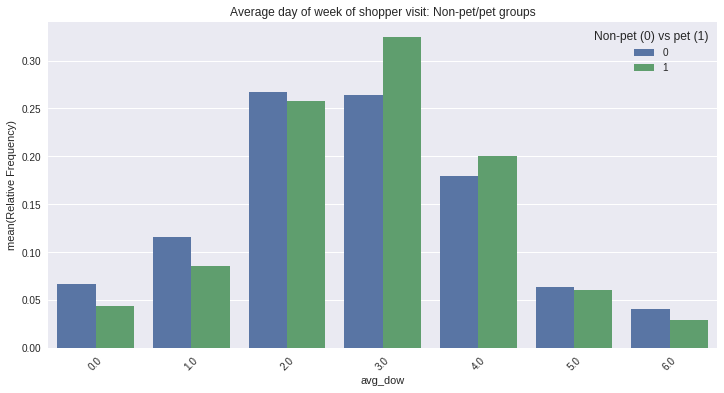

In [43]:
# Average day of week of visit
def get_avg_dow(data):
    avg_dow = data.groupby(["user_id"])["order_dow"].aggregate("mean").reset_index(name="avg_dow")
    avg_dow["avg_dow"] = round(avg_dow["avg_dow"])
    return avg_dow

avg_dow = get_avg_dow(df)
title = "Average day of week of shopper visit: Non-{g}/{g} groups"
col_name = "avg_dow"
plot_group_proportions(avg_dow, df, col_name, "pet", 1, True, title.format(g="pet"))

Summary text.

## User's individual reorder rate. The percentage of orders of an item they make that are reorders.

Admittedly, this plot looks a bit strange. There are huge spikes at 0, 0.1, 0.2... etc... probably a rounding error on my part but let's just ignore it for now :upside_down_face: :) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


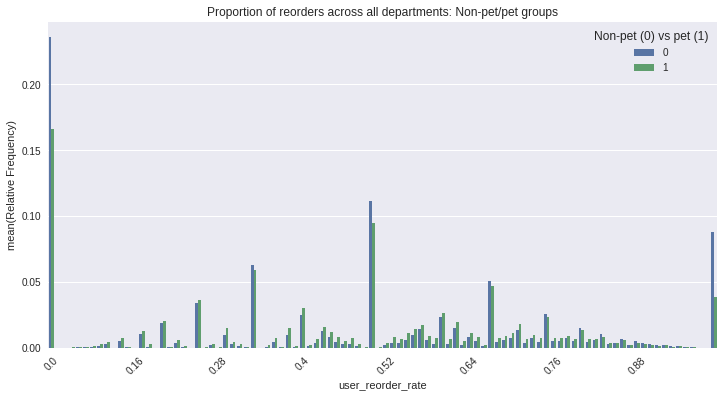

In [45]:
# User's individual reorder rate, i.e. percentage of orders that are reorders
def get_user_reorder_rate(data):
    user_reorder_rate = data.groupby(["user_id"])["reordered"].aggregate("mean").reset_index(name="user_reorder_rate")
    user_reorder_rate["user_reorder_rate"] = round(user_reorder_rate["user_reorder_rate"],2)
    return user_reorder_rate

user_reorder_rate = get_user_reorder_rate(df)
title = "Proportion of reorders across all departments: Non-{g}/{g} groups"
col_name = "user_reorder_rate"
plot_group_proportions(user_reorder_rate, df, col_name, "pet", 12, True, title.format(g="pet"))

Summary text.

# And that's it! Exploratory data analysis, done! Step 1, done!

# Now onto the real fun part: modelling!

Stay tuned for part 2 :) 